# Web Scraping with Python

Simple example of gathering data from a web page and analysing that information. This can then be used to automate processes as data becomes real-time as it updates. Here I am looking for the UK's top export categories and their value in US$.

In [231]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests
import csv

In [232]:
# use requests to get html source
source = requests.get("http://www.worldstopexports.com/united-kingdoms-top-exports/").text

# variable containing source html
soup = BeautifulSoup(source, 'lxml')

In [233]:
# find the table using find and class
table = soup.find('table', class_ = "tablepress tablepress-id-157")

# print the table html
# print(table.prettify)

In [234]:
# use pandas read html on the source
data = pd.read_html(source)

# convert list to DataFrame
df = data[0]
type(df)

pandas.core.frame.DataFrame

In [235]:
# output the DataFrame
df

,Rank,UK's Export Product,2018 Value (US$),Change
0,1,Cars,$42 billion,+0.1%
1,2,Gold (unwrought),$31.6 billion,+85.9%
2,3,Turbo-jets,$24.9 billion,+9.5%
3,4,Crude oil,$24.8 billion,+29.7%
4,5,Medication mixes in dosage,$18.9 billion,-7.7%
5,6,Aircraft parts,$17 billion,+5.1%
6,7,Processed petroleum oils,$13.6 billion,+18.7%
7,8,Blood fractions (including antisera),$8.8 billion,-10.1%
8,9,"Alcohol (including spirits, liqueurs)",$7.9 billion,+8.5%
9,10,Automobile parts/accessories,$7 billion,+5.5%


### Data Wrangling

In [236]:
df.shape

(200, 4)

In [237]:
df.dtypes

Rank                    int64
UK's Export Product    object
2018 Value (US$)       object
Change                 object
dtype: object

In [238]:
df[df['2018 Value (US$)'].str.contains("billion")].head()

,Rank,UK's Export Product,2018 Value (US$),Change
0,1,Cars,$42 billion,+0.1%
1,2,Gold (unwrought),$31.6 billion,+85.9%
2,3,Turbo-jets,$24.9 billion,+9.5%
3,4,Crude oil,$24.8 billion,+29.7%
4,5,Medication mixes in dosage,$18.9 billion,-7.7%


In [239]:
# remove $ sign and text
df['2018 Value (US$)'] = df['2018 Value (US$)'].str.replace('$','').str.replace(' million', '').str.replace(' billion','')

# remove % sign and + sign
df['Change'] = df['Change'].str.replace('+','').str.replace('%', '')

df.head()

,Rank,UK's Export Product,2018 Value (US$),Change
0,1,Cars,42,0.1
1,2,Gold (unwrought),31.6,85.9
2,3,Turbo-jets,24.9,9.5
3,4,Crude oil,24.8,29.7
4,5,Medication mixes in dosage,18.9,-7.7


In [240]:
# convert data type of US$
df['2018 Value (US$)'] = df['2018 Value (US$)'].astype(float)

In [241]:
# represent billions as millions where number lower than 43
df['2018 Value (US$)'] = df.apply(lambda row: row[['2018 Value (US$)']] * 1000 if row['2018 Value (US$)'] < 43.0 
     else row[['2018 Value (US$)']], axis=1)

# alternative method
#print(df.loc[df['2018 Value (US$)']=='a', ['2018 Value (US$)']] * 1000)

In [242]:
df.head()

,Rank,UK's Export Product,2018 Value (US$),Change
0,1,Cars,42000.0,0.1
1,2,Gold (unwrought),31600.0,85.9
2,3,Turbo-jets,24900.0,9.5
3,4,Crude oil,24800.0,29.7
4,5,Medication mixes in dosage,18900.0,-7.7


In [243]:
# convert % column to float data type
df['Change'] = df['Change'].astype(float)
df['Rank'] = df['Rank'].astype(int)
df.dtypes

Rank                     int32
UK's Export Product     object
2018 Value (US$)       float64
Change                 float64
dtype: object

In [244]:
df.columns = ["Rank", "UK's Export Product", "Value $m", "% Change"]
df.head()

,Rank,UK's Export Product,Value $m,% Change
0,1,Cars,42000.0,0.1
1,2,Gold (unwrought),31600.0,85.9
2,3,Turbo-jets,24900.0,9.5
3,4,Crude oil,24800.0,29.7
4,5,Medication mixes in dosage,18900.0,-7.7


In [245]:
df.describe()

,Rank,Value $m,% Change
count,200.000000,200.000000,200.000000
mean,100.500000,2014.295500,12.945500
std,57.879185,4801.882609,40.220113
min,1.000000,331.300000,-45.700000
25%,50.750000,526.100000,-0.725000
50%,100.500000,832.600000,5.100000
75%,150.250000,1500.000000,11.925000
max,200.000000,42000.000000,351.100000


In [246]:
top_20 = df.head(20)

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

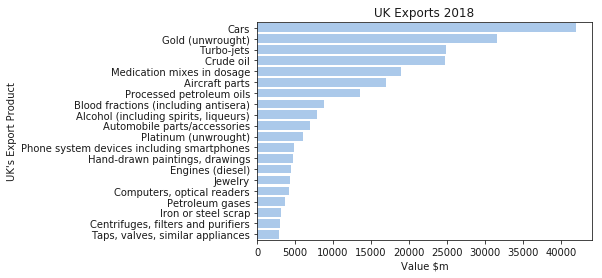

In [262]:
sns.set_color_codes("pastel");
output = sns.barplot(x="Value $m", y="UK's Export Product", data=top_20,
            label="Total", color="b").set_title("UK Exports 2018");